<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [13]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import psycopg2
import warnings

# отключение предупреждений для "чистоты" ноутбука
warnings.filterwarnings('ignore')

In [14]:
# параметры для подключения
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [15]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [16]:
# текст запроса
query_3_1 = f'''
select 
    count(*)
from vacancies
'''

In [17]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
print('Количество вакансий в нашей базе:', df.iloc[0,0])

Количество вакансий в нашей базе: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [18]:
# текст запроса
query_3_2 = f'''
select 
    count(distinct id)
from employers
'''

In [19]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
print('Количество работодателей:', df.iloc[0,0])

Количество работодателей: 23501


3. Посчитайте с помощью запроса количество регионов (таблица areas).

In [20]:
# текст запроса
query = f'''
select 
    count(distinct id)
from areas
'''

In [21]:
# результат запроса
df = pd.read_sql_query(query, connection)
print('Количество регионов:', df.iloc[0, 0])

Количество регионов: 1362


4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица industries).

In [22]:
# текст запроса
query = f'''
select 
    count(distinct name)
from industries
'''

In [23]:
# результат запроса
df = pd.read_sql_query(query, connection)
print('Количество сфер деятельности в базе:', df.iloc[0,0])

Количество сфер деятельности в базе: 294


***
# Выводы по предварительному анализу данных

Произвели подключение к таблицам *vacancies*, *employes*, *areas*, *industries*.
По результатам предварительного анализа данных было установлено:
* Количество вакансий в базе: **49197**
* Количество работодателей: **23501**
* Количество регионов: **1362**
* Количество сфер деятельности в базе: **294**

***

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [24]:
# текст запроса
query = f'''
select 
    a.name area,
    count(v.id) cnt
from 
    vacancies v
    join areas a on a.id = v.area_id
group by
    a.name
order by 2 desc
limit 5
'''

In [25]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [26]:
# текст запроса
query = f'''
select 
    count(*)
from 
    vacancies
where 
    salary_from is not null
    or salary_to is not null
'''

In [27]:
# результат запроса
df = pd.read_sql_query(query, connection)
print(f'У {df.iloc[0, 0]} вакансий заполнено хотя бы одно из двух полей с зарплатой')

У 24073 вакансий заполнено хотя бы одно из двух полей с зарплатой


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [28]:
# текст запроса
query = f'''
select 
    round(avg(salary_from)) avg_salary_from,
    round(avg(salary_to)) avg_salary_to
from 
    vacancies
'''

In [29]:
# результат запроса
df = pd.read_sql_query(query, connection)
print(f'Среднее значение для нижней границы зарплатной вилки: {df.iloc[0,0]}')
print(f'Среднее значение для верхней границы зарплатной вилки: {df.iloc[0,1]}')

Среднее значение для нижней границы зарплатной вилки: 71065.0
Среднее значение для верхней границы зарплатной вилки: 110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [30]:
# текст запроса
query = f'''
select distinct
    schedule,
    employment,
    count(*)
from 
    vacancies
group by
    schedule,
    employment
order by 3 desc
'''

In [31]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)
print(f'Пара ** {df.iloc[1, 0]} - {df.iloc[1, 1]} ** находится на втором месте по популярности')

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


Пара ** Удаленная работа - Полная занятость ** находится на втором месте по популярности


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [32]:
# текст запроса
query = f'''
select 
    experience,
    count(id) cnt_vacancies
from 
    vacancies
group by
    experience
order by 2 
'''

In [33]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)


,experience,cnt_vacancies
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***
# Выводы по детальному анализу вакансий

Произвели детальный анализ вакансий:
* Большинство вакансий находится в крупных городах. Количество вакансий коррелируется с численностью населения города
* Только у половины вакансий заполнено хотя бы одно из полей зарплаты
* Среднее предложение по зарплатной вилке - от 71 до 111 тыс. руб.
* Основная масса вакансий предполагает Полный день - Полная занятость (35 тыс. вакансий)
* Удаленная работа с Полной занятостью находится на 2 месте по популярности, но вакансий в 5 раз меньше (7 тыс.)
* Подавляющее большинство вакансий предполагает наличие опыта от 1 года до 6 лет


***

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [34]:
# текст запроса
query = f'''
select 
    e.name employer,
    count(v.id) cnt_vacancies
from 
    vacancies v
    join employers e on e.id = v.employer_id
group by
    e.name
order by 2 desc
limit 5
'''

In [35]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)
print(f'На первом месте по числу вакансий находится компания {df.iloc[0,0]}')
print(f'На пятом месте по числу вакансий находится компания {df.iloc[4,0]}')

,employer,cnt_vacancies
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


На первом месте по числу вакансий находится компания Яндекс
На пятом месте по числу вакансий находится компания Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [36]:
# текст запроса
query = f'''
select 
    a.name region,
    count(e.id) cnt_employers,
    count(v.id) cnt_vacancies
from 
    areas a
    left join vacancies v on a.id = v.area_id
    left join employers e on e.area = a.id
where 
    v.id is null
group by
    a.name
order by 2 desc
'''

In [37]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)
print(f'Среди регионов, в которых нет вакансий, наибольшее количество работодателей в регионе "{df.iloc[0, 0]}"')

,region,cnt_employers,cnt_vacancies
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


Среди регионов, в которых нет вакансий, наибольшее количество работодателей в регионе "Россия"


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [38]:
# текст запроса
query = f'''
select 
    e.name employer,
    count(distinct v.area_id) cnt_areas
from 
    employers e
    left join vacancies v on e.id = v.employer_id
group by
    e.name
order by 2 desc
'''

In [39]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)
print(f'Максимальное количество регионов, в которых отдельные работодатели публикуют свои вакансии: {df.iloc[0, 1]}')

,employer,cnt_areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23170,СДЕЛКА,0
23171,Alandr Group,0
23172,СДК,0
23173,Lemon Land Lombard,0


Максимальное количество регионов, в которых отдельные работодатели публикуют свои вакансии: 181


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [40]:
# текст запроса
query = f'''
select 
    count(*)
from 
    employers e
    left join employers_industries ei on e.id = ei.employer_id
where 
    ei.industry_id is null
'''

In [41]:
# результат запроса
df = pd.read_sql_query(query, connection)
print(f'У {df.iloc[0, 0]} работодателей не указана сфера деятельности ')

У 8419 работодателей не указана сфера деятельности 


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [42]:
# текст запроса
query = f'''
select 
    e.name employer,
    count(ei.industry_id) cnt_industries
from 
    employers e
    join employers_industries ei on e.id = ei.employer_id
group by
    e.name
having
    count(ei.industry_id) = 4
order by 1
limit 3
'''

In [43]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)
print(f'На третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности, находится компания "{df.iloc[2, 0]}"')

,employer,cnt_industries
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4


На третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности, находится компания "2ГИС"


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [44]:
# текст запроса
query = f'''
select 
    count(*)
from 
    employers e
    join employers_industries ei on e.id = ei.employer_id
    join industries i on i.id = ei.industry_id
where
    i.name = 'Разработка программного обеспечения'
'''

In [45]:
# результат запроса
df = pd.read_sql_query(query, connection)
print(f'У {df.iloc[0, 0]} работодателей в качестве сферы деятельности указана "Разработка программного обеспечения".')

У 3553 работодателей в качестве сферы деятельности указана "Разработка программного обеспечения".


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [46]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8' # Определяем адрес страницы
table = pd.read_html(url)

In [47]:
# Получаем список столиц
capitals_list = list(table[1]['Город'])
# Исправляем ошибку по г.Воронеж
for i in range(len(capitals_list)):
    if '[a]' in capitals_list[i]:
        capitals_list[i] = capitals_list[i].replace('[a]', '')
# Преобразуем в кортеж для удобства работы с SQL
capitals = tuple(capitals_list)
display(capitals)

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Челябинск',
 'Красноярск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [48]:
# текст запроса
query = f'''
select 
    a.name area,
    count(v.id) cnt_vacancies
from 
    vacancies v
    join employers e on e.id = v.employer_id
    join areas a on a.id = v.area_id
where
    e.name = 'Яндекс'
    and a.name in {capitals}
group by
    a.name

union all

select
    'TOTAL',
    count(*)
from 
    vacancies v
    join employers e on e.id = v.employer_id
    join areas a on a.id = v.area_id
where
    e.name = 'Яндекс'
    and a.name in {capitals}

order by 2

'''

In [49]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)
print(f'Количество строк в выборке: {df.shape[0]}')
print(f'Результат в строке Total: {df.iloc[-1, 1]}')

,area,cnt_vacancies
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


Количество строк в выборке: 17
Результат в строке Total: 485


***
# Выводы по анализу работодателей

Произвели анализ работодателей:
* Проанализировали работодателей по наличию вакансий
* Проанализировали работодателей по регионам их деятельности и количеству вакансий в регионах
* Проанализировали работодателей по количеству указанных сфер деятельности
* Провели анализ работы компании "Яндекс" в городах-миллионниках


***

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [50]:
# текст запроса
query = '''
    select 
        count(*)
    from
        vacancies
    where
        lower(name) like '%data%' 
        or lower(name) like '%данн%'
'''

In [51]:
# результат запроса
df = pd.read_sql_query(query, connection)
print(f'{df.iloc[0, 0]} вакансий имеет отношение к данным')

1771 вакансий имеет отношение к данным


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [52]:
# текст запроса
data_cond = '''(lower(name) like '%data scientist%'
or lower(name) like '%data science%'
or lower(name) like '%исследователь данных%'
or (name like '%ML%' and name not like '%HTML%')
or lower(name) like '%machine learning%'
or lower(name) like '%машинн%обучен%') 
'''
query = f'''
    select 
        name, 
        experience,
        employment
    from 
        vacancies
    where {data_cond}
        and (lower(name) like '%junior%'
        or lower(experience) = 'нет опыта'
        or lower(employment) = 'стажировка')      
'''

In [53]:
# результат запроса
df = pd.read_sql_query(query, connection)
print(f'Есть {df.shape[0]} вакансия, подходящая для начинающего дата-сайентиста')

Есть 51 вакансия, подходящая для начинающего дата-сайентиста


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [54]:
# текст запроса
query = f'''
    select 
        name, 
        key_skills
    from 
        vacancies
    where {data_cond}
        and (key_skills like '%SQL%'
        or lower(key_skills) like '%postgres%')     
'''

In [55]:
# результат запроса
df = pd.read_sql_query(query, connection)
print(f'В базе {df.shape[0]} вакансия для DS, в которых в качестве ключевого навыка указан SQL или postgres')

В базе 201 вакансия для DS, в которых в качестве ключевого навыка указан SQL или postgres


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [56]:
# текст запроса
query = f'''
    select 
        name, 
        key_skills
    from 
        vacancies
    where {data_cond}
        and lower(key_skills) like '%python%'
'''

In [57]:
# результат запроса
df = pd.read_sql_query(query, connection)
print(f'В {df.shape[0]} вакансии в качестве ключевого навыка указан python')

В 351 вакансии в качестве ключевого навыка указан python


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [58]:
# текст запроса
query = f'''
    select 
        round(avg(length(key_skills) - length(replace(key_skills, chr(9), '')) + 1), 2)
    from 
        vacancies
    where {data_cond}
'''

In [59]:
# результат запроса
df = pd.read_sql_query(query, connection)
print(f'В вакансиях для DS в среднем указывают {df.iloc[0, 0]} ключевых навыка')

В вакансиях для DS в среднем указывают 6.41 ключевых навыка


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [60]:
# текст запроса
query = f'''
    select 
        experience,
        round(avg(coalesce((salary_from + salary_to)/2, salary_from, salary_to))) avg_salary
    from 
        vacancies
    where {data_cond}
    and (salary_from is not null or salary_to is not null)
    group by experience
'''

In [61]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)
print(f'Дата-сайентист с опытом работы от 3 до 6 лет может рассчитывать на среднюю зарплату в {df.iloc[2, 1]} рублей')

,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


Дата-сайентист с опытом работы от 3 до 6 лет может рассчитывать на среднюю зарплату в 243115.0 рублей


***
# Выводы по предметному анализу 

Произвели предметный анализ данных:
* Вычислили количество вакансий, имеющих отношение к данным - 1771 шт.
* Вычислили количество вакансий для начинающих дата-сайентистов - 51 шт.
* Вычислили количество вакансий с использованием SQL или Postgres - 201 шт.
* Определили, насколько популярен Python среди работодателей - требуется в 351 вакансии
* Вычислили среднее количество ключевых навыков в вакансиях - 6.41 
* Вычислили среднюю зарплаты дата-сайентистов в зависимости от опыта работы


***

# Дополнительные исследования

### Сравним контурентоспособность профессии дата-сайентиста с средним состоянием по рынку

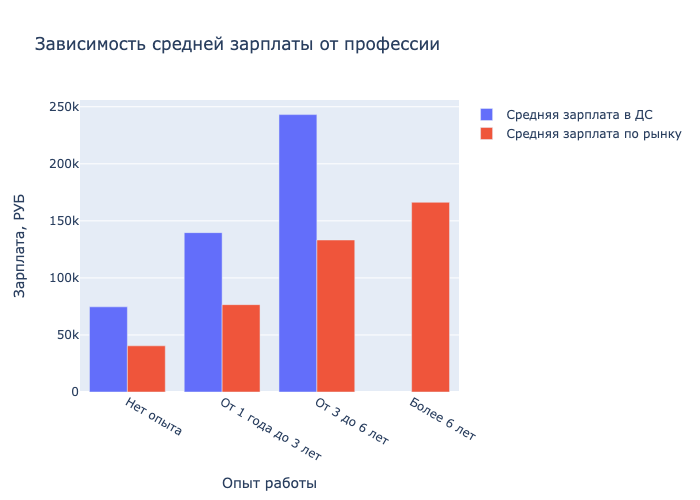

In [62]:
# запрос данных о зарплатах дата-сайентистов
query_ds = f'''
    select 
        experience "Опыт работы",
        round(avg(coalesce((salary_from + salary_to)/2, salary_from, salary_to))) "Средняя зарплата в ДС"
    from 
        vacancies
    where {data_cond}
    and (salary_from is not null or salary_to is not null)
    group by experience
'''

# запрос данных в среднем по рынку
query_market = f'''
    select 
        experience "Опыт работы",
        round(avg(coalesce((salary_from + salary_to)/2, salary_from, salary_to))) "Средняя зарплата по рынку"
    from 
        vacancies
    where 
        (salary_from is not null or salary_to is not null)
    group by experience
'''
# считываем 2 DataFrame
df_ds = pd.read_sql_query(query_ds, connection)
df_market = pd.read_sql_query(query_market, connection)
# объединяем таблицы
df = df_ds.merge(
    right=df_market,
    how='outer',
    on='Опыт работы',
)

# строим диаграммы для сравнения
import plotly.express as px
fig = px.bar(
    data_frame=df,
    x='Опыт работы',
    y=['Средняя зарплата в ДС',	'Средняя зарплата по рынку'],
    orientation='v',
    barmode='group',
    title='Зависимость средней зарплаты от профессии'
)
fig.update_layout(yaxis_title='Зарплата, РУБ', legend_title="")
fig.show("png")

***
# Вывод
Средняя зарплата в Data Science отличается в 1,5-2 раза от средней по рынку
***


# Общий вывод по проекту

В ходе настоящего исследования был проведен всесторонний анализ базы данных вакансий HeadHunter.
В рамках данного анализа применялись следующие методы исследования:
* Фильтрация данных по признакам
* Агрегация данных по параметрам
* Объединение таблиц методами JOIN и UNION
* Подведение промежуточных итогов
* Вычисление строковых функций в SQL
* Экспорт данных из SQL в формат Pandas DataFrame

Были исследованы различные особенности распределения данных по вакансиям HeadHunter, в том числе:
* Распределение вакансий по регионам
* Опреление количества работодателей
* Определение количества сфер ключевых навыков
* Сравнение работодателей по количеству вакансий
* Определение и анализ вакансий в сфере Data Science (в том числе в зависимости от опыта работы)